<img src="http://epecora.com.br/DataFiles/PPGOLD_PPGMNE.png" alt="PPGOLD Data Science: INTRO" width="800">

## **Séries Temporais - PPGMNE:**  

#### LISTA 2

Programa de Pós-Graduação em Métodos Numéricos em Engenharia (PPGMNE)

Disciplina: Series Temporais
Prof.: ANSELMO CHACVES NETO

Exercício – Redes de Petri e Algoritmo Alpha 

* 7.15) Dada a série temporal das vendas mensais de cerveja (série beersales), em milhões de barris, nos US no período de 01/1975 a 12/1990 pede-se:
         a) O Gráfico da série temporal.
         b) A série pode ser considerada sazonal? Por quê?
         c) Fazendo o Gráfico do Periodograma Integrado, você diria que existe parte sistemática que pode ser modelada? Por quê?
         d) Calcule as autocovariâncias e autocorrelações de lags 1, 2 e 3.
         e) Calcule a média e a variância da série.
         f) Faça os gráficos da FAC (autocorrelação) e da FACP (autocorrelação parcial).
        g) Qual o nome dos limites no Gráfico do Periodograma Integrado?
 
* 7.16) Uma série temporal é um processo estocástico? Por quê? Se sim de que tipo é o processo estocástico? Por quê?

* 7.17) Dada a série temporal do item 7.14, ou seja, </br>
| Zt | 12 14 16 14 18 20 19 22 24 23 | </br>
| t | 1  2   3   4   5   6   7   8   9  10 | </br>

 pede-se: 
  a) A série é estacionária na média? Por quê?
  b) Se a série não for estacionária na média é possível aplicar a Metodologia de Box & Jenkins direto? O que se deve fazer, então?




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from scipy.signal import periodogram
import matplotlib.pyplot as plt

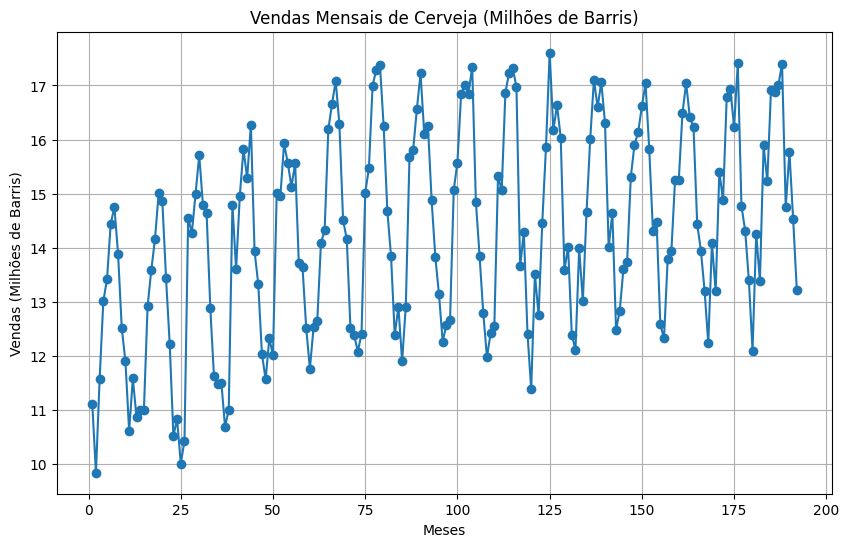

In [12]:
data = pd.read_csv(r'C:\Users\55489\Documents\GitHub\ts_ppgmne\Dados Beer Sales\dadosBeersales.csv')

# a) Gráfico da série temporal
plt.figure(figsize=(10, 6))
plt.plot(data['meses'], data['barrels'], marker='o')
plt.title('Vendas Mensais de Cerveja (Milhões de Barris)')
plt.xlabel('Meses')
plt.ylabel('Vendas (Milhões de Barris)')
plt.grid(True)
plt.show()

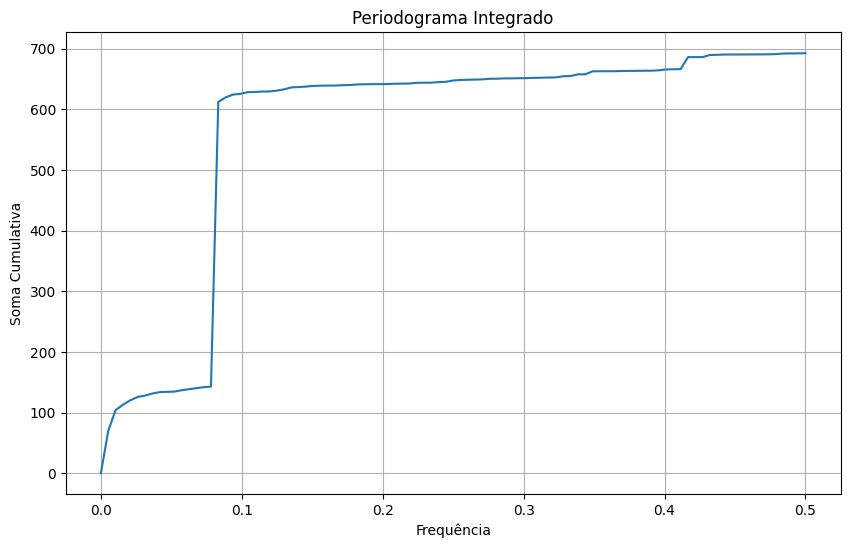

In [13]:
# b) Sazonalidade

# c) Gráfico do Periodograma Integrado
frequencies, Pxx = periodogram(data['barrels'], fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.cumsum(Pxx))
plt.title('Periodograma Integrado')
plt.xlabel('Frequência')
plt.ylabel('Soma Cumulativa')
plt.grid(True)
plt.show()

Uma série temporal é um processo estocástico?

Sim. Porque uma série temporal consiste em observações que variam ao longo do tempo de maneira incerta, sendo, portanto, modelada como um processo estocástico.
De que tipo é o processo estocástico?

Pode ser de diferentes tipos, dependendo das características da série:
Estacionário: Se a média, variância, e autocorrelação não mudam ao longo do tempo.
Não Estacionário: Se há tendência, sazonalidade ou mudanças na variância ao longo do tempo.
Autorregressivo (AR): Se as observações atuais dependem linearmente das passadas.
Média Móvel (MA): Se as observações atuais dependem de uma média ponderada de erros passados.
Integrado (I): Se a série se torna estacionária após diferenciação.

In [14]:
# d) Autocovariâncias e Autocorrelações de lags 1, 2 e 3
autocorr = acf(data['barrels'], fft=False)
autocov = np.cov(data['barrels'], rowvar=False)

print("Autocorrelações para lag 1, 2 e 3:")
for i in range(1, 4):
    print(f"Lag {i}: {autocorr[i]}")

# Calculo das autocovariâncias usando acf e variância
print("\nAutocovariâncias para lag 1, 2 e 3:")
for i in range(1, 4):
    print(f"Lag {i}: {autocorr[i] * np.var(data['barrels'])}")

Autocorrelações para lag 1, 2 e 3:
Lag 1: 0.7716530126813325
Lag 2: 0.5393301757557105
Lag 3: 0.18835200437195174

Autocovariâncias para lag 1, 2 e 3:
Lag 1: 2.783024728155483
Lag 2: 1.9451349131043134
Lag 3: 0.679305694593671


In [15]:
# e) Média e variância da série
media = np.mean(data['barrels'])
variancia = np.var(data['barrels'])

print(f"\nMédia da série: {media}")
print(f"Variância da série: {variancia}")


Média da série: 14.278977604166668
Variância da série: 3.60657534205051


<Figure size 1000x600 with 0 Axes>

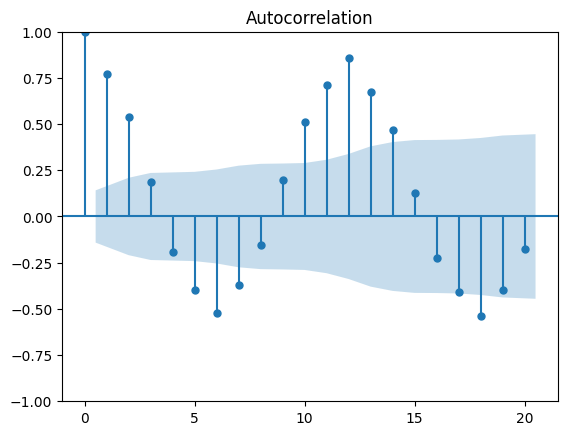

<Figure size 1000x600 with 0 Axes>

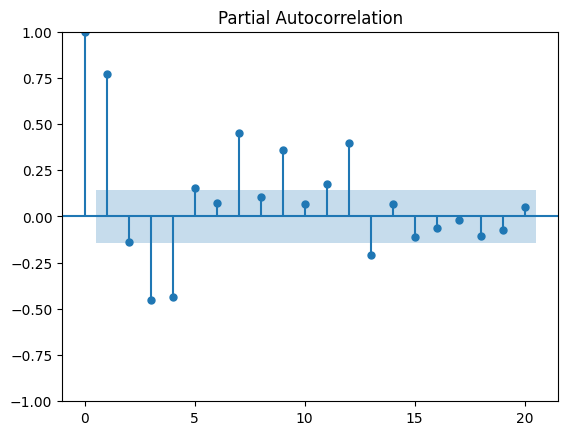


Os limites no Gráfico do Periodograma Integrado referem-se ao nível de significância estatística, como uma indicação dos picos mais relevantes que podem ser modelados.


In [16]:
# f) Gráficos da FAC (autocorrelação) e FACP (autocorrelação parcial)
plt.figure(figsize=(10, 6))
plot_acf(data['barrels'], lags=20)
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(data['barrels'], lags=20)
plt.show()

# g) Limites no Gráfico do Periodograma Integrado
print("\nOs limites no Gráfico do Periodograma Integrado referem-se ao nível de significância estatística, como uma indicação dos picos mais relevantes que podem ser modelados.")

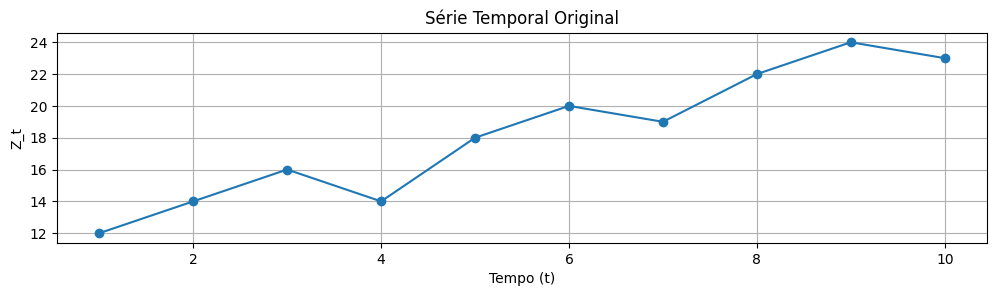

In [17]:
# Dados da série temporal
Z_t = np.array([12, 14, 16, 14, 18, 20, 19, 22, 24, 23])
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Diferenciação da série para remover a tendência
dZ_t = np.diff(Z_t)

# Gráfico da série original
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, Z_t, marker='o', linestyle='-')
plt.title('Série Temporal Original')
plt.xlabel('Tempo (t)')
plt.ylabel('Z_t')
plt.grid(True)

a) A série é estacionária na média? Por quê?
Não.
Razão: Para uma série ser estacionária na média, a média deve ser constante ao longo do tempo. Observando a série apresenta uma tendência de crescimento, especialmente nos valores posteriores (tendência crescente). Isso indica que a média da série não é constante, ou seja, a série não é estacionária na média. </br>
b) Se a série não for estacionária na média, é possível aplicar a Metodologia de Box & Jenkins direto? O que se deve fazer, então?
Não, não é possível aplicar diretamente.
O que se deve fazer: </br>
Para aplicar a Metodologia de Box & Jenkins, a série deve ser estacionária. Quando a série não é estacionária na média, como neste caso, é comum aplicar a diferenciação para remover a tendência e tornar a série estacionária. A diferenciação consiste em calcular a diferença entre valores consecutivos na série (
Após a diferenciação, se a série resultante for estacionária, pode-se então aplicar a Metodologia de Box & Jenkins.

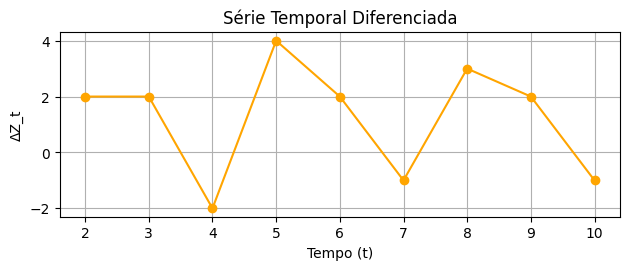

In [18]:
# Gráfico da série diferenciada
plt.subplot(2, 1, 2)
plt.plot(t[1:], dZ_t, marker='o', linestyle='-', color='orange')
plt.title('Série Temporal Diferenciada')
plt.xlabel('Tempo (t)')
plt.ylabel('ΔZ_t')
plt.grid(True)

plt.tight_layout()
plt.show()